<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/Prophet_Rossmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/rossmann_train.csv

--2023-11-30 12:59:45--  https://lazyprogrammer.me/course_files/timeseries/rossmann_train.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38057952 (36M) [text/csv]
Saving to: ‘rossmann_train.csv’

rossmann_train.csv  100%[===================>]  36.29M  39.2MB/s    in 0.9s    

2023-11-30 12:59:47 (39.2 MB/s) - ‘rossmann_train.csv’ saved [38057952/38057952]



In [ ]:
df = pd.read_csv("/content/rossmann_train.csv",low_memory = False)

In [ ]:
df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

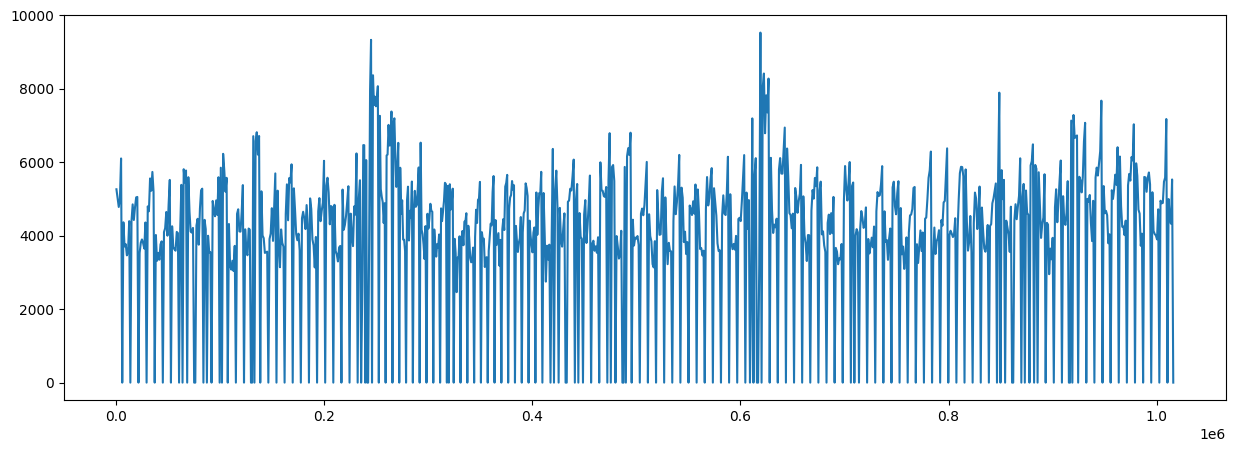

In [ ]:
df[df['Store'] == 1]['Sales'].plot(figsize = (15,5));

In [ ]:
(df[df['Store'] == 1]['Sales'] == 0).sum()

161

In [ ]:
(df[df['Store'] == 1]['Open'] == 0).sum()

161

In [ ]:
store1 = df[df['Store'] == 1].copy()

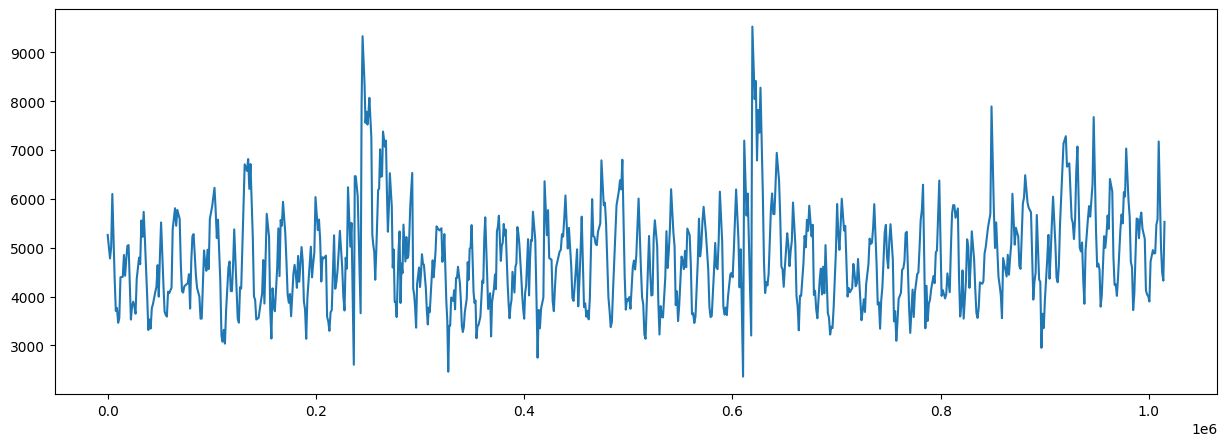

In [ ]:
#No need to calculate the time series when the store is closed
store1[store1['Open'] > 0]['Sales'].plot(figsize = (15,5));

In [ ]:
sales0 = store1[store1['Sales'] == 0].index
customer0 = store1[store1['Customers'] == 0].index
store_closed = store1[store1['Open'] == 0].index
print(np.all(sales0 == customer0))
print(np.all(store_closed == customer0))

True
True


In [ ]:
store1.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0         1          5  2015-07-31   5263        555     1      1   
1115      1          4  2015-07-30   5020        546     1      1   
2230      1          3  2015-07-29   4782        523     1      1   
3345      1          2  2015-07-28   5011        560     1      1   
4460      1          1  2015-07-27   6102        612     1      1   

     StateHoliday  SchoolHoliday  
0               0              1  
1115            0              1  
2230            0              1  
3345            0              1  
4460            0              1

In [ ]:
store1['Date'] = pd.to_datetime(store1['Date'])

In [ ]:
store1.set_index('Date',inplace = True)

In [ ]:
store1.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          5   5263        555     1      1            0   
2015-07-30      1          4   5020        546     1      1            0   
2015-07-29      1          3   4782        523     1      1            0   
2015-07-28      1          2   5011        560     1      1            0   
2015-07-27      1          1   6102        612     1      1            0   

            SchoolHoliday  
Date                       
2015-07-31              1  
2015-07-30              1  
2015-07-29              1  
2015-07-28              1  
2015-07-27              1

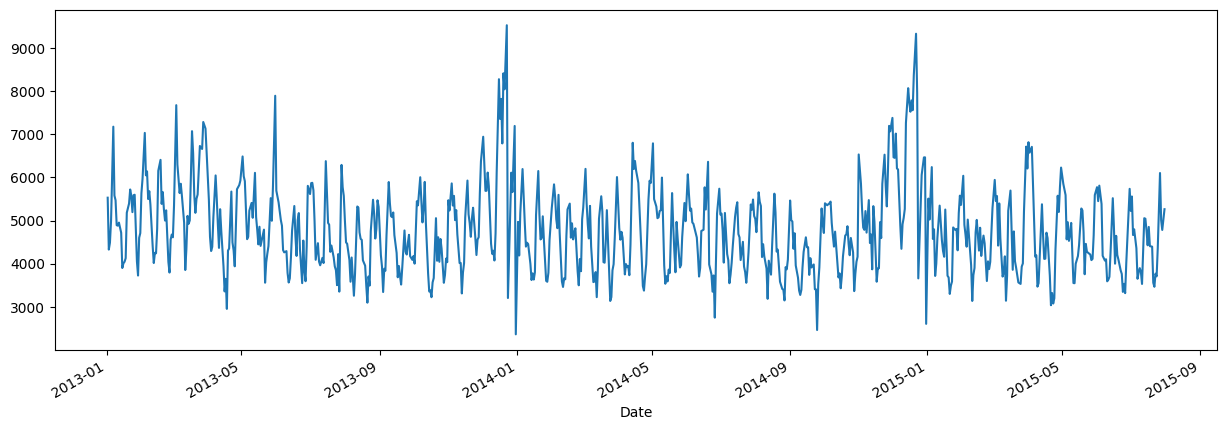

In [ ]:
store1[store1['Customers'] > 0]['Sales'].plot(figsize = (15,5));

In [ ]:
df_p = store1[['Sales']].copy()

In [ ]:
df_p['Date']  = df_p.index

In [ ]:
df_p.head()

Sales       Date
Date                        
2015-07-31   5263 2015-07-31
2015-07-30   5020 2015-07-30
2015-07-29   4782 2015-07-29
2015-07-28   5011 2015-07-28
2015-07-27   6102 2015-07-27

In [ ]:
df_p.tail()

Sales       Date
Date                        
2013-01-05   4997 2013-01-05
2013-01-04   4486 2013-01-04
2013-01-03   4327 2013-01-03
2013-01-02   5530 2013-01-02
2013-01-01      0 2013-01-01

In [ ]:
df_p.sort_index(inplace = True)

In [ ]:
df_p.head(20)

Sales       Date
Date                        
2013-01-01      0 2013-01-01
2013-01-02   5530 2013-01-02
2013-01-03   4327 2013-01-03
2013-01-04   4486 2013-01-04
2013-01-05   4997 2013-01-05
2013-01-06      0 2013-01-06
2013-01-07   7176 2013-01-07
2013-01-08   5580 2013-01-08
2013-01-09   5471 2013-01-09
2013-01-10   4892 2013-01-10
2013-01-11   4881 2013-01-11
2013-01-12   4952 2013-01-12
2013-01-13      0 2013-01-13
2013-01-14   4717 2013-01-14
2013-01-15   3900 2013-01-15
2013-01-16   4008 2013-01-16
2013-01-17   4044 2013-01-17
2013-01-18   4127 2013-01-18
2013-01-19   5182 2013-01-19
2013-01-20      0 2013-01-20

In [ ]:
df_p.tail()

Sales       Date
Date                        
2015-07-27   6102 2015-07-27
2015-07-28   5011 2015-07-28
2015-07-29   4782 2015-07-29
2015-07-30   5020 2015-07-30
2015-07-31   5263 2015-07-31

In [ ]:
df_p.columns = ['y','ds']

In [ ]:
m = Prophet()

In [ ]:
m.fit(df_p)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/wec9z5x8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/p2aob0xl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80392', 'data', 'file=/tmp/tmp_85m01ax/wec9z5x8.json', 'init=/tmp/tmp_85m01ax/p2aob0xl.json', 'output', 'file=/tmp/tmp_85m01ax/prophet_model8p61zm2b/prophet_model-20231130125951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:59:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:59:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [87]:
#Make the periods that we want to forecast
future = m.make_future_dataframe(periods = 365)

In [88]:
future.head()

ds
0 2013-01-01
1 2013-01-02
2 2013-01-03
3 2013-01-04
4 2013-01-05

In [89]:
future.tail()

ds
1302 2016-07-26
1303 2016-07-27
1304 2016-07-28
1305 2016-07-29
1306 2016-07-30

In [90]:
forecast = m.predict(future)

In [91]:
forecast.tail()

ds        trend   yhat_lower   yhat_upper  trend_lower  \
1302 2016-07-26  3737.006584  3101.329294  5913.042768  3712.986905   
1303 2016-07-27  3736.790476  2841.973341  5548.925975  3712.642183   
1304 2016-07-28  3736.574369  2395.472305  5402.139931  3712.327435   
1305 2016-07-29  3736.358262  2778.764907  5762.050903  3711.966506   
1306 2016-07-30  3736.142155  3188.591783  6147.390390  3711.626725   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
1302  3761.446635      712.976598            712.976598            712.976598   
1303  3761.311776      502.194964            502.194964            502.194964   
1304  3761.223812      126.297608            126.297608            126.297608   
1305  3761.127015      530.730605            530.730605            530.730605   
1306  3761.016677      937.345499            937.345499            937.345499   

          weekly  weekly_lower  weekly_upper     yearly  yearly_lower  \
1302  706.327351    706.327351    706.327351   6.649247      6.649247   
1303  510.548409    510.548409    510.548409  -8.353445     -8.353445   
1304  151.277962    151.277962    151.277962 -24.980354    -24.980354   
1305  573.629123    573.629123    573.629123 -42.898519    -42.898519   
1306  999.100089    999.100089    999.100089 -61.754591    -61.754591   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
1302      6.649247                   0.0                         0.0   
1303     -8.353445                   0.0                         0.0   
1304    -24.980354                   0.0                         0.0   
1305    -42.898519                   0.0                         0.0   
1306    -61.754591                   0.0                         0.0   

      multiplicative_terms_upper         yhat  
1302                         0.0  4449.983182  
1303                         0.0  4238.985441  
1304                         0.0  3862.871977  
1305                         0.0  4267.088867  
1306                         0.0  4673.487653

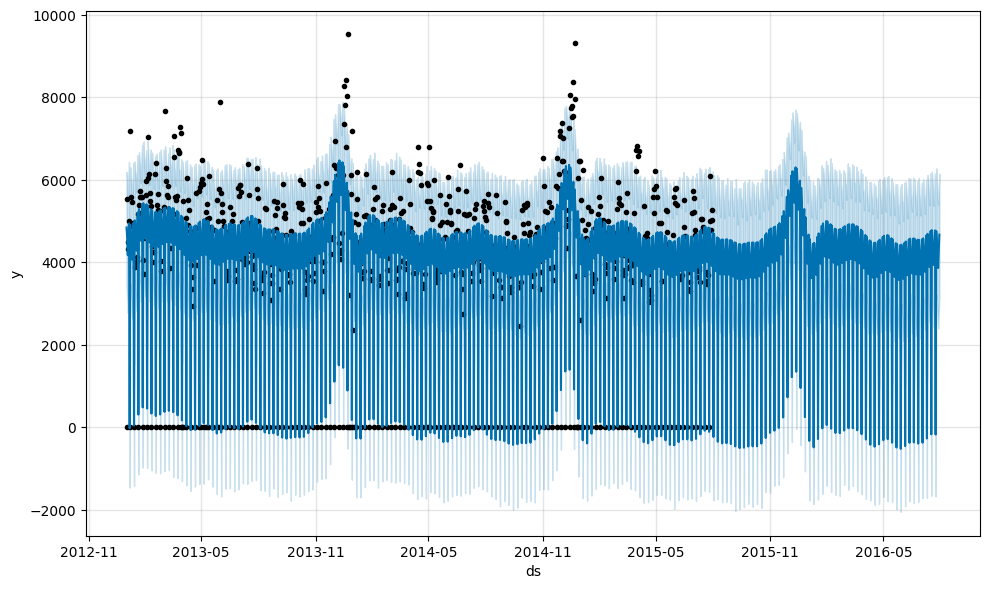

In [92]:
m.plot(forecast);

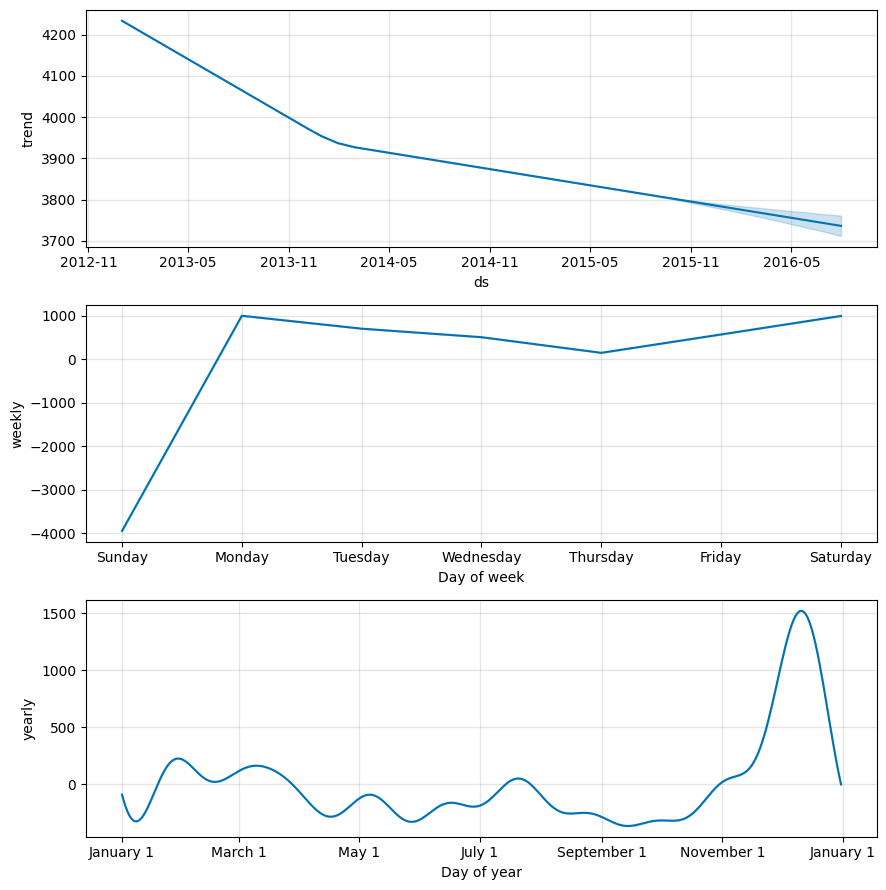

In [93]:
m.plot_components(forecast);

# **Model Open Days only**

In [94]:
df_p2 = store1[store1['Open'] > 0][['Sales']].copy()

In [95]:
df_p2['Date'] = df_p2.index

In [96]:
df_p2.head()

Sales       Date
Date                        
2015-07-31   5263 2015-07-31
2015-07-30   5020 2015-07-30
2015-07-29   4782 2015-07-29
2015-07-28   5011 2015-07-28
2015-07-27   6102 2015-07-27

In [97]:
df_p2.columns = ['y','ds']

In [98]:
m2 = Prophet()
m2.fit(df_p2)
future2 = m2.make_future_dataframe(periods = 365)
forecast2 = m2.predict(future2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/w0s75sq6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/44u_hbf2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86542', 'data', 'file=/tmp/tmp_85m01ax/w0s75sq6.json', 'init=/tmp/tmp_85m01ax/44u_hbf2.json', 'output', 'file=/tmp/tmp_85m01ax/prophet_model7wurhgyc/prophet_model-20231130130449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:04:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:04:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


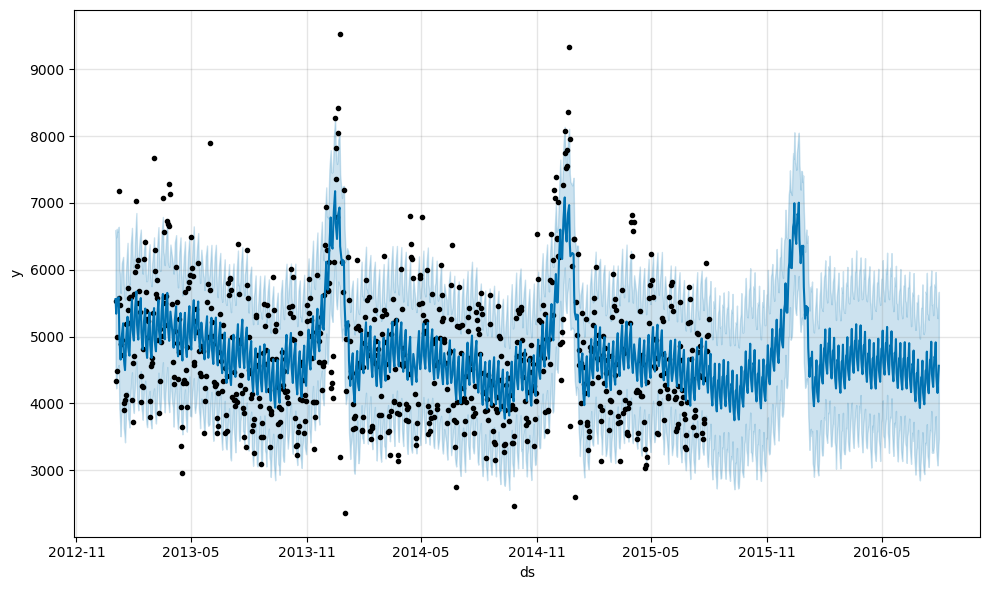

In [99]:
m2.plot(forecast2);

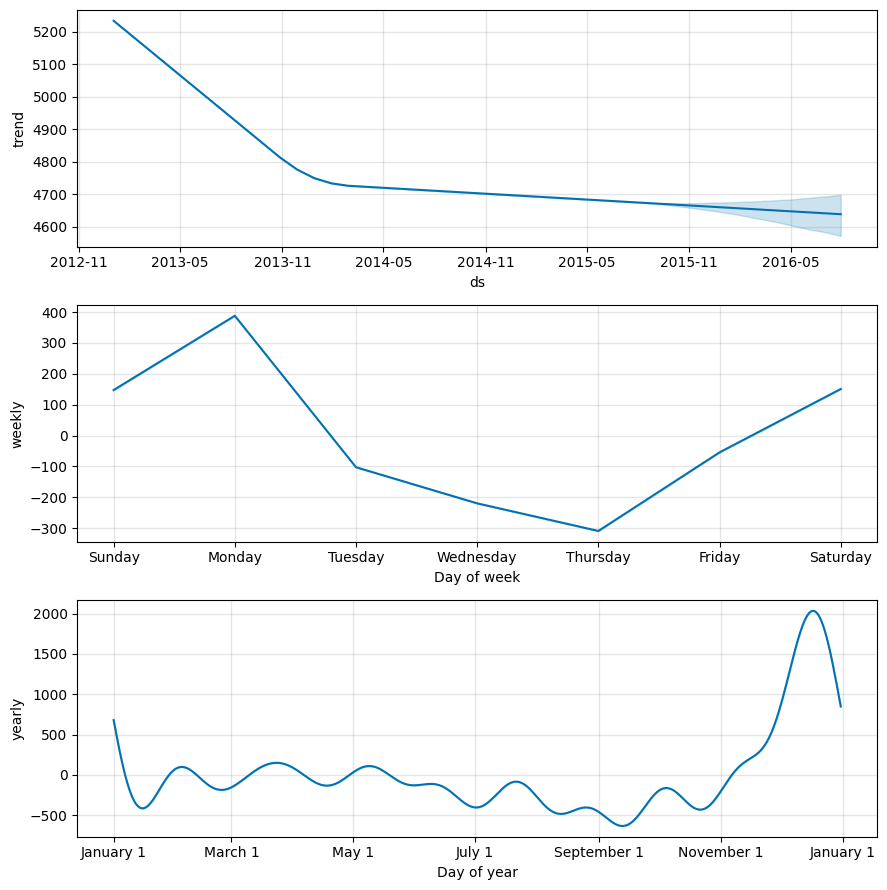

In [100]:
m2.plot_components(forecast2);

# **Add Holidays**

In [101]:
m3 = Prophet()

In [102]:
m3.add_country_holidays(country_name = 'US')

In [103]:
m3.fit(df_p2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/e24a042g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/6gx4l7_6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72392', 'data', 'file=/tmp/tmp_85m01ax/e24a042g.json', 'init=/tmp/tmp_85m01ax/6gx4l7_6.json', 'output', 'file=/tmp/tmp_85m01ax/prophet_modelx1dvol8w/prophet_model-20231130130502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:05:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:05:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future3 = m3.make_future_dataframe(periods = 365)

In [105]:
forecast3 = m3.predict(future3)

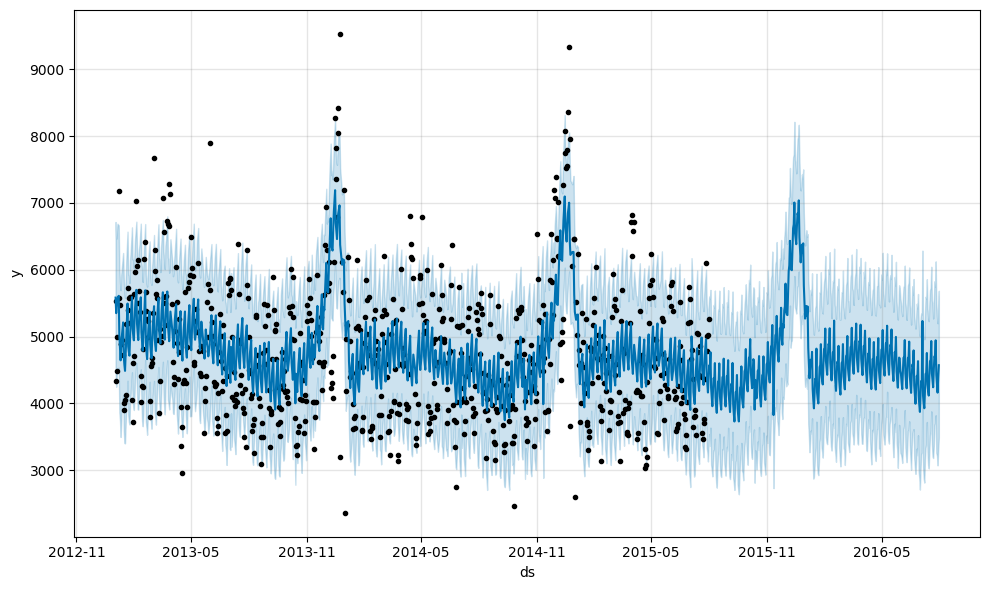

In [104]:
m3.plot(forecast3);

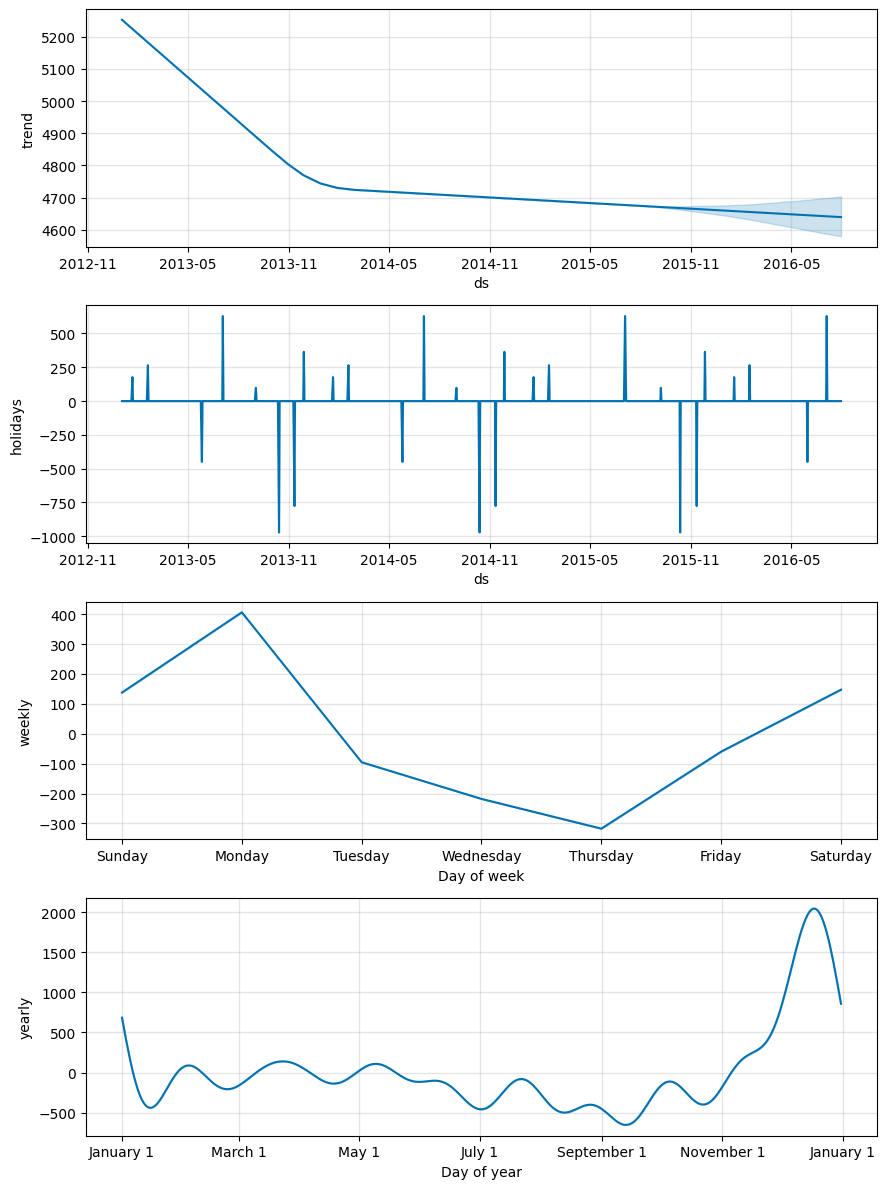

In [106]:
m3.plot_components(forecast3);

# **Add Regressors**

In [107]:
set(store1['StateHoliday'])

{'0', 'a', 'b', 'c'}

In [108]:
set(store1['SchoolHoliday'])

{0, 1}

In [109]:
df_p['Open'] = store1['Open']
df_p['Promo'] = store1['Promo']
df_p[['SH1','SH2','SH3']] = pd.get_dummies(
    store1['StateHoliday'],drop_first = True
)
df_p['SchoolHoliday'] = store1['SchoolHoliday']

In [110]:
df_p.head(10)

y         ds  Open  Promo  SH1  SH2  SH3  SchoolHoliday
Date                                                                  
2013-01-01     0 2013-01-01     0      0    1    0    0              1
2013-01-02  5530 2013-01-02     1      0    0    0    0              1
2013-01-03  4327 2013-01-03     1      0    0    0    0              1
2013-01-04  4486 2013-01-04     1      0    0    0    0              1
2013-01-05  4997 2013-01-05     1      0    0    0    0              1
2013-01-06     0 2013-01-06     0      0    0    0    0              1
2013-01-07  7176 2013-01-07     1      1    0    0    0              1
2013-01-08  5580 2013-01-08     1      1    0    0    0              1
2013-01-09  5471 2013-01-09     1      1    0    0    0              1
2013-01-10  4892 2013-01-10     1      1    0    0    0              1

In [111]:
m4 = Prophet()
m4.add_regressor('Open',mode = 'multiplicative')
m4.add_regressor('Promo',mode = 'additive')
m4.add_regressor('SH1',mode = 'additive')
m4.add_regressor('SH2',mode = 'additive')
m4.add_regressor('SH3',mode = 'additive')
m4.add_regressor('SchoolHoliday',mode = 'additive')
m4.fit(df_p)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/4vftsyl4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/optyuhi1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38024', 'data', 'file=/tmp/tmp_85m01ax/4vftsyl4.json', 'init=/tmp/tmp_85m01ax/optyuhi1.json', 'output', 'file=/tmp/tmp_85m01ax/prophet_modeljkkfweph/prophet_model-20231130130527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:05:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:05:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future4 = m4.make_future_dataframe(periods = 365)

In [112]:
train_idx = future4['ds'].isin(df_p.index)
test_idx = ~train_idx

In [113]:
regressors = ['Open','Promo','SH1','SH2','SH3','SchoolHoliday']
for r in regressors:
  future4.loc[train_idx,r] = df_p[r].to_list()

In [114]:
future4.head()

ds  Open  Promo  SH1  SH2  SH3  SchoolHoliday
0 2013-01-01   0.0    0.0  1.0  0.0  0.0            1.0
1 2013-01-02   1.0    0.0  0.0  0.0  0.0            1.0
2 2013-01-03   1.0    0.0  0.0  0.0  0.0            1.0
3 2013-01-04   1.0    0.0  0.0  0.0  0.0            1.0
4 2013-01-05   1.0    0.0  0.0  0.0  0.0            1.0

In [115]:
future4.tail()

ds  Open  Promo  SH1  SH2  SH3  SchoolHoliday
1302 2016-07-26   1.0    1.0  0.0  0.0  0.0            1.0
1303 2016-07-27   1.0    1.0  0.0  0.0  0.0            1.0
1304 2016-07-28   1.0    1.0  0.0  0.0  0.0            1.0
1305 2016-07-29   1.0    1.0  0.0  0.0  0.0            1.0
1306 2016-07-30   1.0    1.0  0.0  0.0  0.0            1.0

In [116]:
future4.loc[test_idx,'Open'] = \
future4.loc[test_idx,'ds'].apply(lambda x : 1.0 * (x.weekday() != 6))

In [117]:
for r in regressors[1:]:
  future4.loc[test_idx,r] = \
  df_p.iloc[-365:][r].to_list()

In [118]:
future4.tail(10)

ds  Open  Promo  SH1  SH2  SH3  SchoolHoliday
1297 2016-07-21   1.0    0.0  0.0  0.0  0.0            0.0
1298 2016-07-22   1.0    0.0  0.0  0.0  0.0            0.0
1299 2016-07-23   1.0    0.0  0.0  0.0  0.0            0.0
1300 2016-07-24   0.0    0.0  0.0  0.0  0.0            0.0
1301 2016-07-25   1.0    0.0  0.0  0.0  0.0            0.0
1302 2016-07-26   1.0    1.0  0.0  0.0  0.0            1.0
1303 2016-07-27   1.0    1.0  0.0  0.0  0.0            1.0
1304 2016-07-28   1.0    1.0  0.0  0.0  0.0            1.0
1305 2016-07-29   1.0    1.0  0.0  0.0  0.0            1.0
1306 2016-07-30   1.0    1.0  0.0  0.0  0.0            1.0

In [119]:
forecast4 = m4.predict(future4)

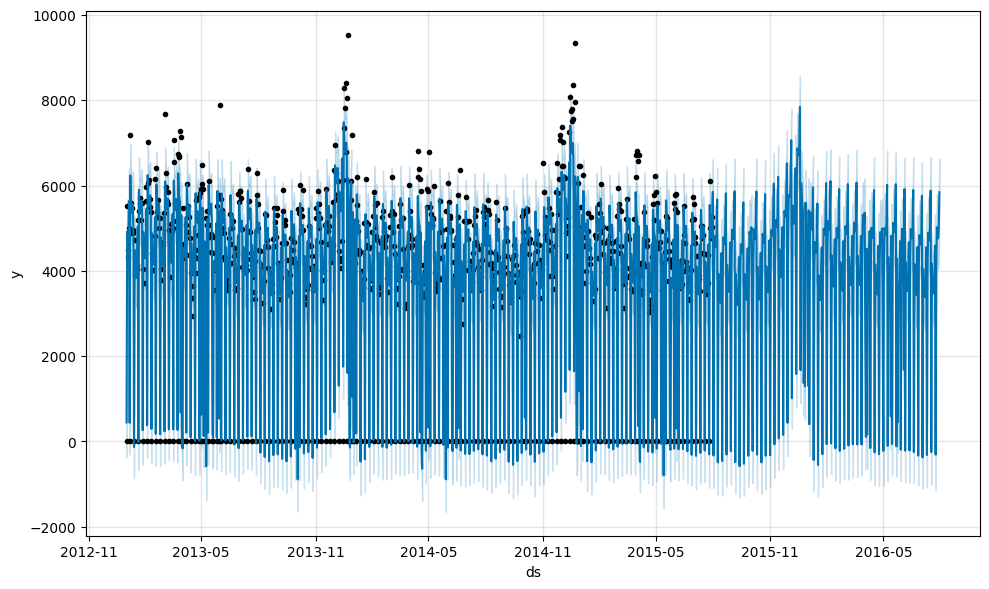

In [120]:
m4.plot(forecast4);

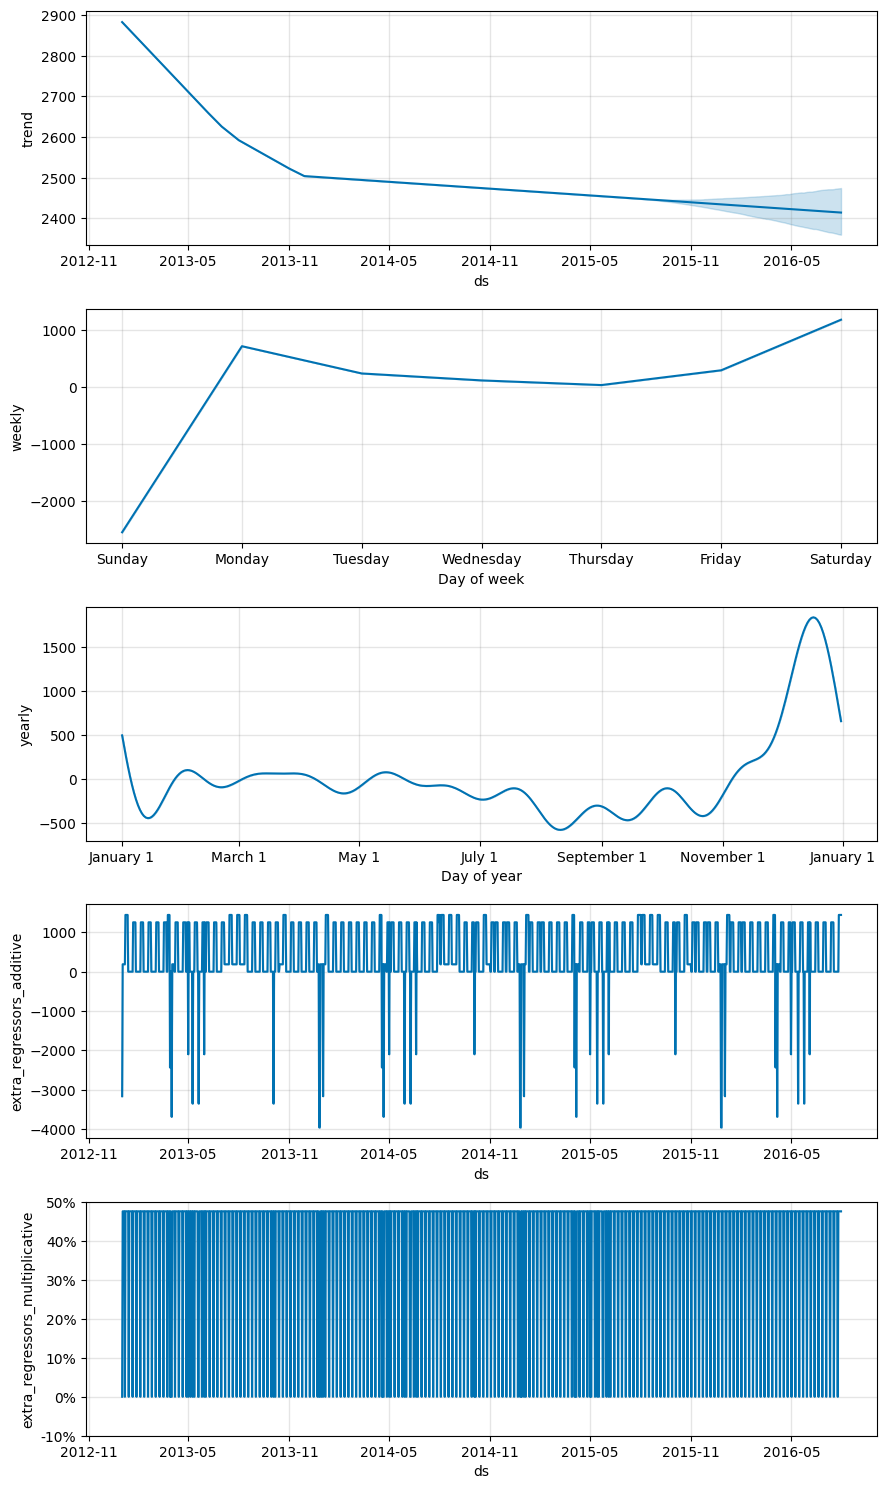

In [121]:
m4.plot_components(forecast4);

# **Cross validation**

In [122]:
from prophet.diagnostics import cross_validation

In [123]:
df_cv = cross_validation(
    m,
    initial = '730 days',
    period = '30 days',
    horizon = '60 days'
)

INFO:prophet:Making 6 forecasts with cutoffs between 2015-01-02 00:00:00 and 2015-06-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/jhqq2ffi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/7q4mstuy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36446', 'data', 'file=/tmp/tmp_85m01ax/jhqq2ffi.json', 'init=/tmp/tmp_85m01ax/7q4mstuy.json', 'output', 'file=/tmp/tmp_85m01ax/prophet_modelpsb4aqb4/prophet_model-20231130130553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:05:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:05:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/g9ul_ais.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/kthgwwxg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [124]:
df_cv

ds         yhat   yhat_lower   yhat_upper     y     cutoff
0   2015-01-03  4615.078024  3141.613038  6139.382785  5023 2015-01-02
1   2015-01-04  -441.329567 -1902.551900  1099.430679     0 2015-01-02
2   2015-01-05  4577.297952  3210.938437  5945.026192  6239 2015-01-02
3   2015-01-06  4192.554600  2728.047647  5706.736465  4574 2015-01-02
4   2015-01-07  3954.266652  2582.556393  5396.690298  4796 2015-01-02
..         ...          ...          ...          ...   ...        ...
355 2015-07-27  4793.185822  3374.129847  6339.495248  6102 2015-06-01
356 2015-07-28  4468.525329  2881.277347  5964.063308  5011 2015-06-01
357 2015-07-29  4253.993015  2749.467862  5703.621439  4782 2015-06-01
358 2015-07-30  3878.474594  2466.343627  5269.115911  5020 2015-06-01
359 2015-07-31  4270.580026  2808.430284  5707.020237  5263 2015-06-01

[360 rows x 6 columns]

In [125]:
from prophet.diagnostics import performance_metrics

In [126]:
pm = performance_metrics(df_cv)
pm

INFO:prophet:Skipping MAPE because y close to 0


horizon           mse         rmse          mae     mdape     smape  \
0   6 days  2.221907e+06  1490.606233   916.401145  0.136352  0.549672   
1   7 days  1.586059e+06  1259.388169   755.702258  0.131923  0.491074   
2   8 days  1.462228e+06  1209.226354   702.909346  0.121570  0.485751   
3   9 days  1.167759e+06  1080.628999   688.755074  0.144083  0.453643   
4  10 days  5.071586e+05   712.150669   578.830295  0.157249  0.460524   
5  11 days  4.990523e+05   706.436362   570.572715  0.149351  0.403887   
6  12 days  8.642007e+05   929.623983   635.784274  0.149351  0.450846   
7  13 days  8.332394e+05   912.819460   607.752040  0.135079  0.442365   
8  14 days  7.885248e+05   887.989209   569.338951  0.123263  0.433648   
9  15 days  6.591358e+05   811.871814   498.608783  0.103094  0.414846   
10 16 days  5.868050e+05   766.031951   433.053052  0.093358  0.398983   
11 17 days  6.557124e+05   809.760699   486.649076  0.102839  0.464416   
12 18 days  3.176962e+05   563.645422   452.781728  0.109335  0.371884   
13 19 days  3.922958e+05   626.335245   498.007886  0.135672  0.386339   
14 20 days  4.752436e+05   689.379177   566.919890  0.170476  0.402210   
15 21 days  5.303031e+05   728.219118   593.263506  0.184563  0.412732   
16 22 days  6.452537e+05   803.276844   680.727293  0.226132  0.433497   
17 23 days  1.151818e+06  1073.227925   745.330598  0.228204  0.477453   
18 24 days  1.082903e+06  1040.626423   697.352501  0.211194  0.519507   
19 25 days  1.035693e+06  1017.690182   674.262928  0.180822  0.456583   
20 26 days  9.660517e+05   982.879288   622.556408  0.162344  0.445035   
21 27 days  1.052037e+06  1025.688627   657.481379  0.157386  0.444059   
22 28 days  1.206658e+06  1098.479776   706.850096  0.157386  0.449530   
23 29 days  1.375609e+06  1172.863447   791.252771  0.157386  0.461426   
24 30 days  1.655842e+06  1286.795053   920.256704  0.177950  0.485530   
25 31 days  2.348108e+06  1532.353603  1121.876452  0.217367  0.609432   
26 32 days  2.522819e+06  1588.338510  1200.700421  0.223523  0.567396   
27 33 days  2.724821e+06  1650.703134  1185.219679  0.217367  0.600946   
28 34 days  3.150606e+06  1774.994603  1220.979694  0.217367  0.637437   
29 35 days  2.392677e+06  1546.828163  1005.661856  0.156949  0.567893   
30 36 days  2.168413e+06  1472.553195   904.533942  0.134811  0.549675   
31 37 days  1.479458e+06  1216.329592   710.119264  0.118666  0.483315   
32 38 days  1.326898e+06  1151.910604   644.573564  0.118666  0.528144   
33 39 days  1.109260e+06  1053.213951   665.450846  0.129848  0.450741   
34 40 days  5.163803e+05   718.596045   574.973379  0.136924  0.407892   
35 41 days  5.208293e+05   721.685044   574.915520  0.138623  0.407752   
36 42 days  8.772537e+05   936.618225   628.167539  0.132828  0.451606   
37 43 days  8.487436e+05   921.272826   603.110783  0.127824  0.442684   
38 44 days  8.195458e+05   905.287678   583.149510  0.123948  0.437834   
39 45 days  6.922340e+05   832.005989   514.244791  0.100268  0.472510   
40 46 days  5.902547e+05   768.280379   436.213840  0.091902  0.398948   
41 47 days  6.299704e+05   793.706750   479.398615  0.096006  0.407155   
42 48 days  2.644532e+05   514.250128   423.571867  0.097944  0.364840   
43 49 days  3.075630e+05   554.583614   449.603501  0.106508  0.374356   
44 50 days  4.032916e+05   635.052473   514.117623  0.114871  0.389178   
45 51 days  4.556076e+05   674.987103   540.857997  0.149343  0.399298   
46 52 days  5.727404e+05   756.796122   624.871115  0.220727  0.474684   
47 53 days  1.157497e+06  1075.870273   734.305846  0.230620  0.474306   
48 54 days  1.112875e+06  1054.928942   712.868306  0.202100  0.468409   
49 55 days  1.091724e+06  1044.855840   700.489943  0.202100  0.464089   
50 56 days  1.043505e+06  1021.520906   665.208310  0.166284  0.455091   
51 57 days  1.106081e+06  1051.703849   686.414118  0.157443  0.450879   
52 58 days  1.234555e+06  1111.105099   723.363629  0.157443  0.453538   
53 59 d

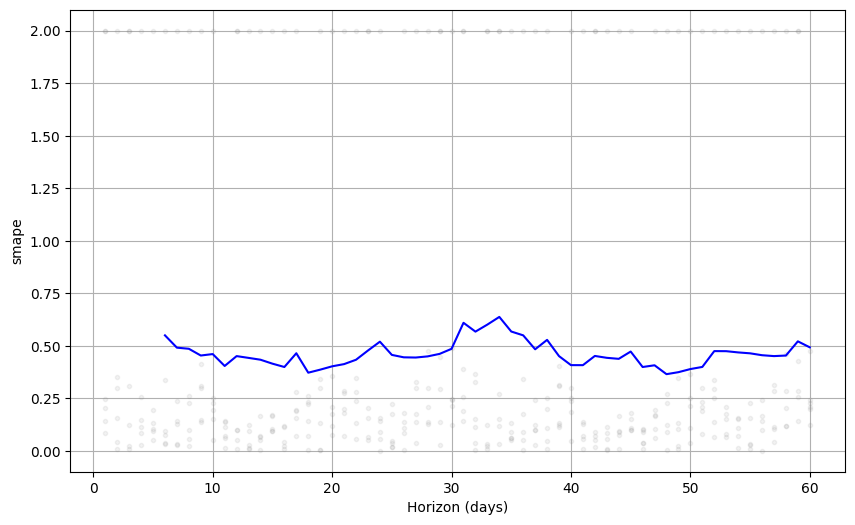

In [127]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv,metric = 'smape');

In [128]:
df_cv2 = cross_validation(
    m2,
    initial = '730 days',
    period = '30 days',
    horizon = '60 days'
)

INFO:prophet:Making 6 forecasts with cutoffs between 2015-01-02 00:00:00 and 2015-06-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/bv_glra6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/whtnogn4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43867', 'data', 'file=/tmp/tmp_85m01ax/bv_glra6.json', 'init=/tmp/tmp_85m01ax/whtnogn4.json', 'output', 'file=/tmp/tmp_85m01ax/prophet_model81rob8n9/prophet_model-20231130130612.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:06:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:06:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/60kciycc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/s52dzuz_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [129]:
pm2 = performance_metrics(df_cv2)

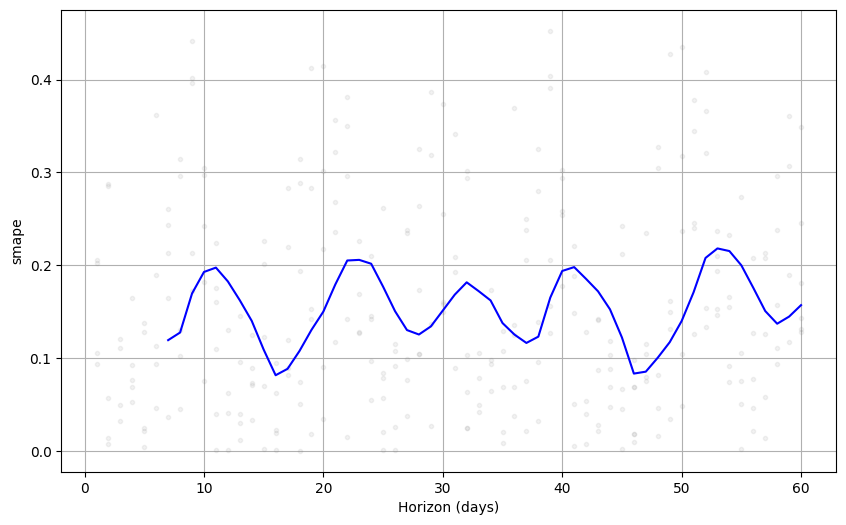

In [130]:
#Cylindrical pattern
plot_cross_validation_metric(df_cv2,metric = 'smape');

In [131]:
df_cv3 = cross_validation(
    m3,
    initial = '730 days',
    period = '30 days',
    horizon = '60 days'
)
pm3 = performance_metrics(df_cv3)

INFO:prophet:Making 6 forecasts with cutoffs between 2015-01-02 00:00:00 and 2015-06-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/vhsn3lvm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/o2rie1b2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57730', 'data', 'file=/tmp/tmp_85m01ax/vhsn3lvm.json', 'init=/tmp/tmp_85m01ax/o2rie1b2.json', 'output', 'file=/tmp/tmp_85m01ax/prophet_modelud5456vu/prophet_model-20231130130621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:06:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:06:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/ohxxu4si.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/xa_kwuvx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

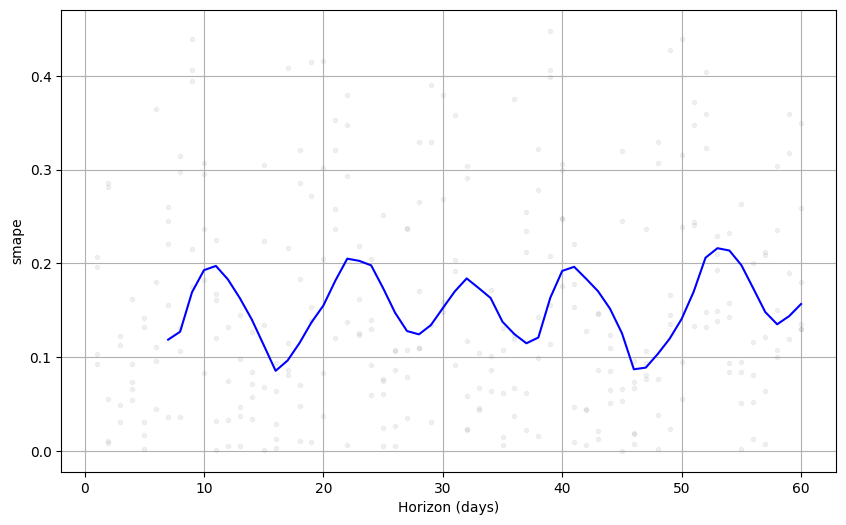

In [132]:
plot_cross_validation_metric(df_cv3,metric = 'smape');

In [133]:
df_cv4 = cross_validation(
    m4,
    initial = '730 days',
    period = '30 days',
    horizon = '60 days'
)
pm4 = performance_metrics(df_cv4)

INFO:prophet:Making 6 forecasts with cutoffs between 2015-01-02 00:00:00 and 2015-06-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/j_s8bz8q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/xlbxrjd0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41406', 'data', 'file=/tmp/tmp_85m01ax/j_s8bz8q.json', 'init=/tmp/tmp_85m01ax/xlbxrjd0.json', 'output', 'file=/tmp/tmp_85m01ax/prophet_modelg08fe__g/prophet_model-20231130130629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:06:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:06:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/hxngw7dz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/t5h8n2xc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

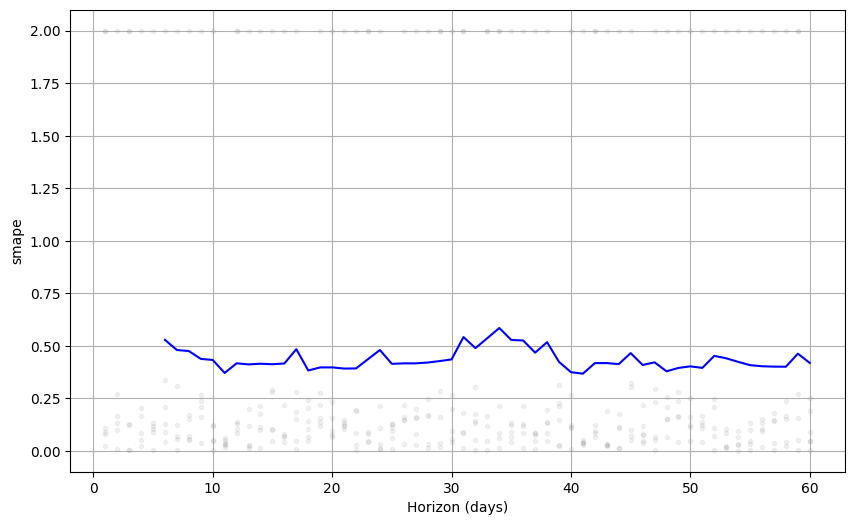

In [134]:
plot_cross_validation_metric(df_cv4,metric = 'smape');

In [ ]:
#Second model is the best model which removed all the 0 sales data
#Fourth model - The adding of regressors only have tiny effect on the performance of the model
pm['smape'].mean(),pm2['smape'].mean(),pm3['smape'].mean(),pm4['smape'].mean()

(0.4618028476859648,
 0.15377883720125704,
 0.15407098843781575,
 0.43577042363634255)

# **Changepoint Detection**

In [135]:
from prophet.plot import add_changepoints_to_plot

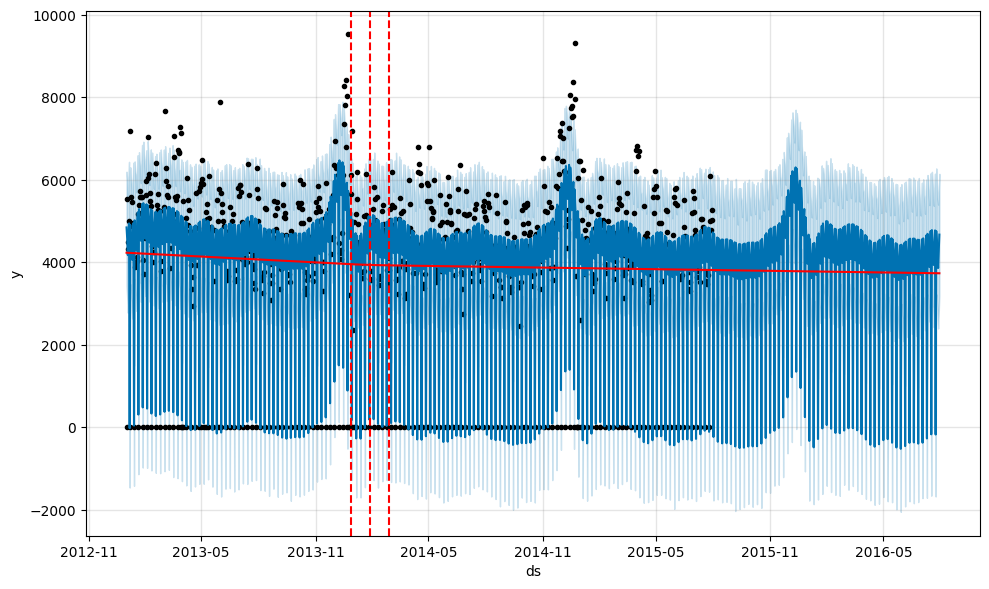

In [136]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

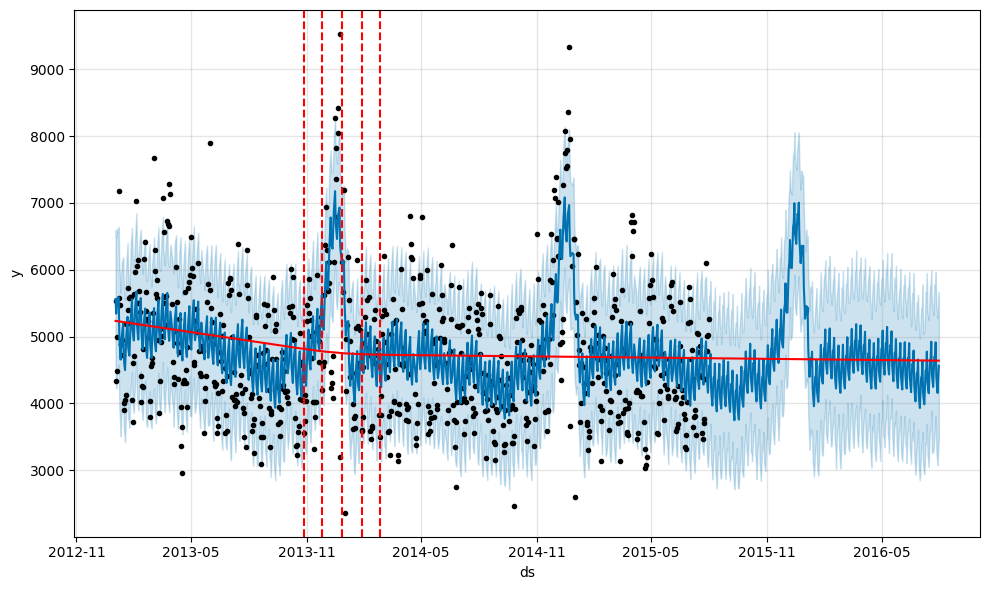

In [137]:
fig = m2.plot(forecast2)
a = add_changepoints_to_plot(fig.gca(),m2,forecast2)

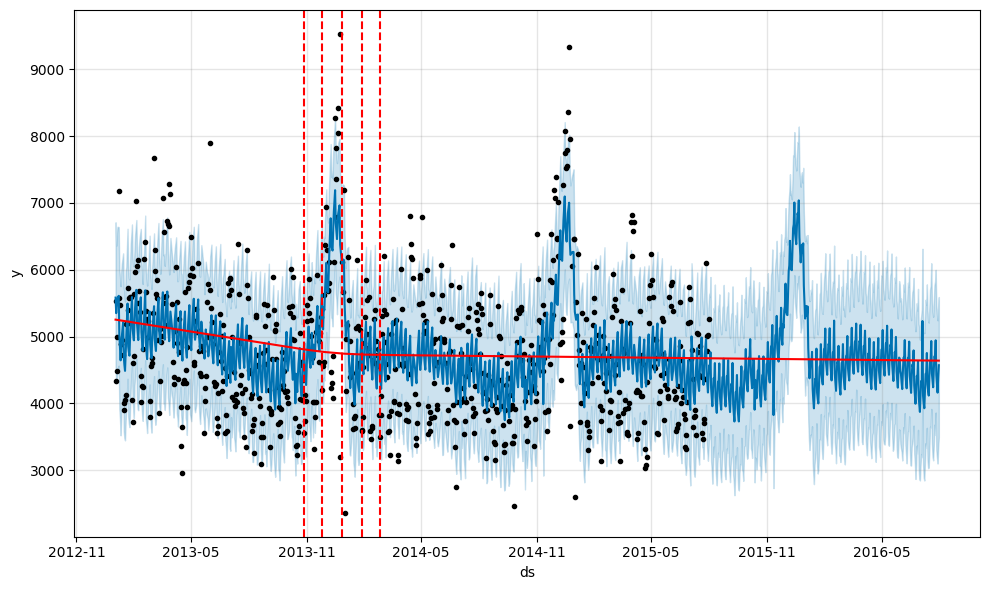

In [142]:
fig = m3.plot(forecast3)
a = add_changepoints_to_plot(fig.gca(),m3,forecast3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/a6_12k7i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/n3ziyqlp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88635', 'data', 'file=/tmp/tmp_85m01ax/a6_12k7i.json', 'init=/tmp/tmp_85m01ax/n3ziyqlp.json', 'output', 'file=/tmp/tmp_85m01ax/prophet_modelodn8wmpp/prophet_model-20231130131615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:16:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:16:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


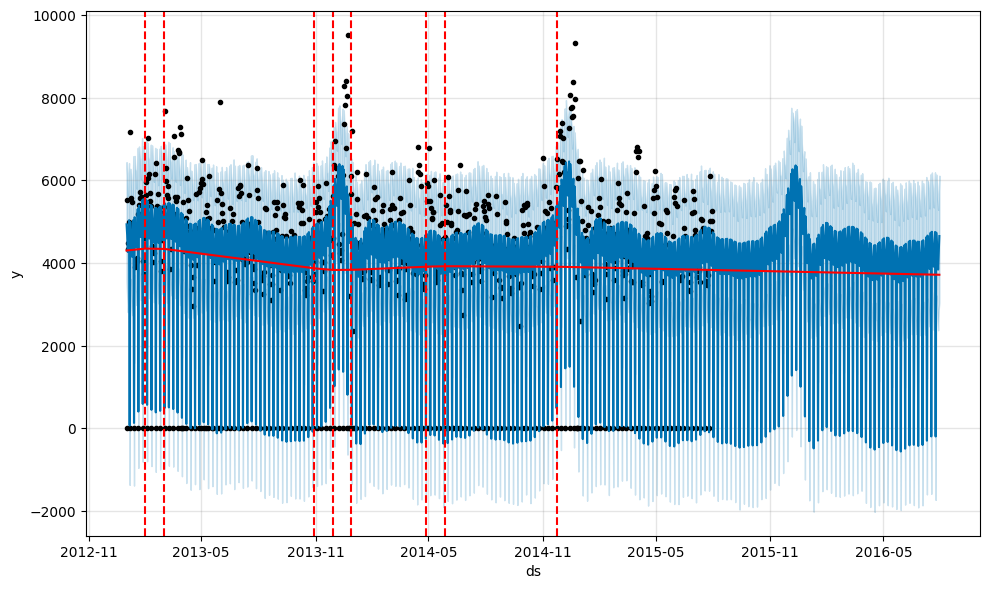

In [144]:
#Increase the scale to make the changepoint more flexible
#Decrease the scale to decline the flexibility
#Default scale is 0.05
m_a = Prophet(changepoint_prior_scale = 0.5)
forecast_a = m_a.fit(df_p).predict(future)
fig = m_a.plot(forecast_a)
a = add_changepoints_to_plot(fig.gca(),m_a,forecast_a)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/jl8fyy4o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/lur5wf88.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76815', 'data', 'file=/tmp/tmp_85m01ax/jl8fyy4o.json', 'init=/tmp/tmp_85m01ax/lur5wf88.json', 'output', 'file=/tmp/tmp_85m01ax/prophet_models4v5hrxx/prophet_model-20231130131811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:18:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:18:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


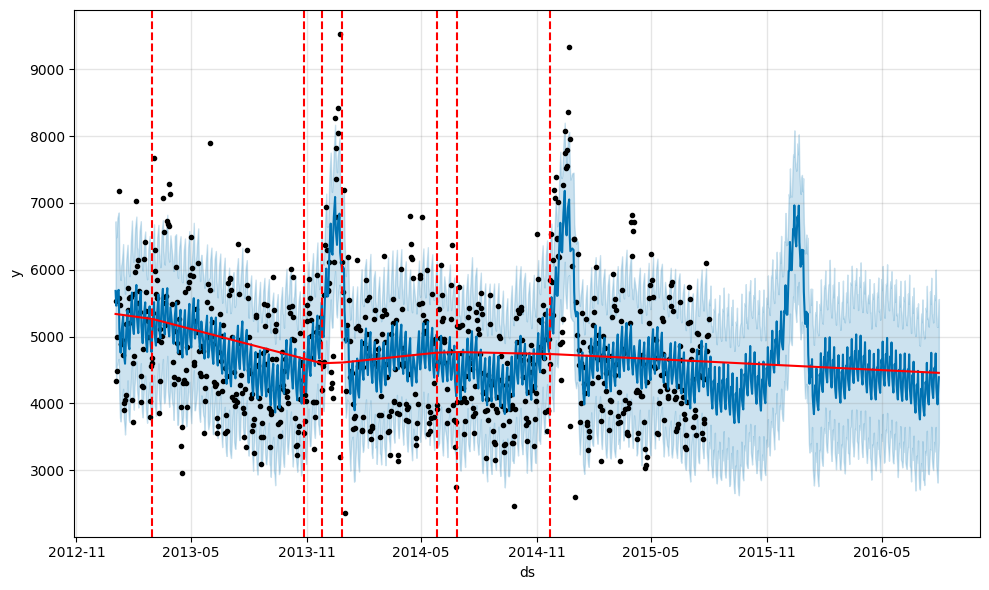

In [146]:
m2_a = Prophet(changepoint_prior_scale = 0.5)
forecast2_a = m2_a.fit(df_p2).predict(future2)
fig = m2_a.plot(forecast2_a)
a = add_changepoints_to_plot(fig.gca(),m2_a,forecast2_a)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/ra85tzb3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_85m01ax/hdy3dqim.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21237', 'data', 'file=/tmp/tmp_85m01ax/ra85tzb3.json', 'init=/tmp/tmp_85m01ax/hdy3dqim.json', 'output', 'file=/tmp/tmp_85m01ax/prophet_modelclua0m6n/prophet_model-20231130132233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


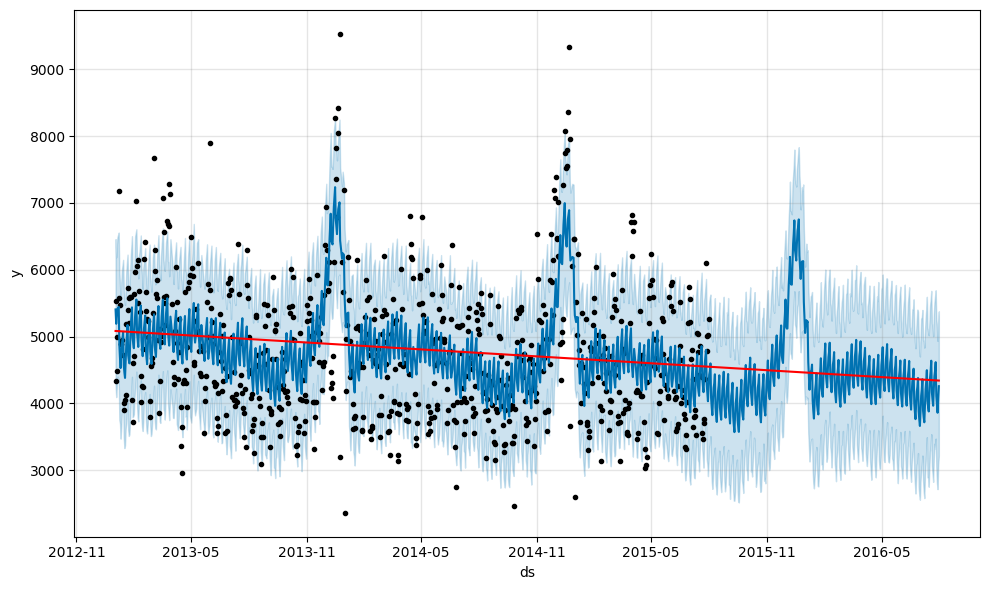

In [148]:
m2_a = Prophet(changepoint_prior_scale = 0.005)
forecast2_a = m2_a.fit(df_p2).predict(future2)
fig = m2_a.plot(forecast2_a)
a = add_changepoints_to_plot(fig.gca(),m2_a,forecast2_a)